In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("USA_cars_datasets.csv")

In [3]:
df.shape

(2499, 13)

In [4]:
df.head(5)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


######  Check Unnamed: 0's content 

In [6]:
df['Unnamed: 0']

0          0
1          1
2          2
3          3
4          4
        ... 
2494    2494
2495    2495
2496    2496
2497    2497
2498    2498
Name: Unnamed: 0, Length: 2499, dtype: int64

In [7]:
df['Unnamed: 0'].nunique()

2499

In [8]:
#Checking the number of rows in unnamed: 0 with number of rows in dataframe
df['Unnamed: 0'].nunique() == df.shape[0]

True

In [9]:
del df['Unnamed: 0']

In [10]:
df.head(3)

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left


###### Now will check Vin Column

In [11]:
df['vin'].nunique()
#2499 rows 2495 unique rows 4 duplicate values 

2495

In [12]:
#Percentage of unique data
round((2495/2499)*100,2)

99.84

###### Checking for duplicated values of Vin

In [13]:
df['vin'].value_counts()


  3gcrkse37ag234620    2
  1gnevhkw8jj148388    2
  1gndt13s632267445    2
  1g1al58f787159241    2
  2c4rdgbgxgr116627    1
                      ..
  1g1ze5st5gf315602    1
  1fm5k7f82kgb41597    1
  1fm5k8d80dgc79389    1
  2c3cdxbg6lh100855    1
  3gcpcpeh2eg231868    1
Name: vin, Length: 2495, dtype: int64

###### 4 Duplicate values
1gnevhkw8jj148388    
1gndt13s632267445    
3gcrkse37ag234620    
1g1al58f787159241   
######  Checking the rows for which Vin is same

In [14]:
df['vin'][0]

'  jtezu11f88k007763'

In [15]:
#As vin contains WhiteSpace we can either use lstrip or add a space to our data
df[df['vin']=='  1gnevhkw8jj148388']

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
336,26900,chevrolet,traverse,2018,clean vehicle,42941.0,black,1gnevhkw8jj148388,167781794,missouri,usa,20 hours left
661,26900,chevrolet,traverse,2018,clean vehicle,42941.0,black,1gnevhkw8jj148388,167781794,missouri,usa,19 hours left


In [16]:
df[df['vin'] == '  1gndt13s632267445']

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
310,0,chevrolet,door,2003,salvage insurance,194673.0,gray,1gndt13s632267445,167650636,texas,usa,18 hours left
530,0,chevrolet,door,2003,salvage insurance,194673.0,gray,1gndt13s632267445,167650636,texas,usa,17 hours left


In [17]:
df[df['vin'] == '  3gcrkse37ag234620']

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
319,25,chevrolet,pickup,2010,salvage insurance,149189.0,white,3gcrkse37ag234620,167650663,colorado,usa,18 hours left
541,25,chevrolet,pickup,2010,salvage insurance,149189.0,white,3gcrkse37ag234620,167650663,colorado,usa,17 hours left


In [18]:
df[df['vin'] == '  1g1al58f787159241']

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
301,50,chevrolet,door,2008,salvage insurance,172102.0,blue,1g1al58f787159241,167650632,texas,usa,18 hours left
518,50,chevrolet,door,2008,salvage insurance,172102.0,blue,1g1al58f787159241,167650632,texas,usa,17 hours left


Looks like a data entry mistake as only condition has changes rest all of the data is same 
Hence we can drop the vin column

In [19]:
del df['vin']

In [20]:
df.head(2)

,price,brand,model,year,title_status,mileage,color,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,166951262,tennessee,usa,6 days left


###### Now will check 'lot' for the same conditions

In [21]:
df['lot'].nunique()

2495

In [22]:
round((2495/2499)*100,2)

99.84

In [23]:
df['lot'].value_counts()

167650636    2
167781794    2
167650632    2
167650663    2
167495679    1
            ..
167799518    1
167783132    1
167617243    1
167715808    1
167802337    1
Name: lot, Length: 2495, dtype: int64

Looks similar to Vin Column So can drop it


In [24]:
del df['lot']

In [25]:
df.head(2)

,price,brand,model,year,title_status,mileage,color,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa,6 days left


In [26]:
df.describe()


,price,year,mileage
count,2499.000000,2499.000000,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04
std,12116.094936,3.442656,5.970552e+04
min,0.000000,1973.000000,0.000000e+00
25%,10200.000000,2016.000000,2.146650e+04
50%,16900.000000,2018.000000,3.536500e+04
75%,25555.500000,2019.000000,6.347250e+04
max,84900.000000,2020.000000,1.017936e+06


In [27]:
#converting scientific to decimal
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [28]:
df.describe()

,price,year,mileage
count,2499.000,2499.000,2499.000
mean,18767.671,2016.714,52298.685
std,12116.095,3.443,59705.516
min,0.000,1973.000,0.000
25%,10200.000,2016.000,21466.500
50%,16900.000,2018.000,35365.000
75%,25555.500,2019.000,63472.500
max,84900.000,2020.000,1017936.000


C:\Users\Abdullah Fazili\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mileage', ylabel='Density'>

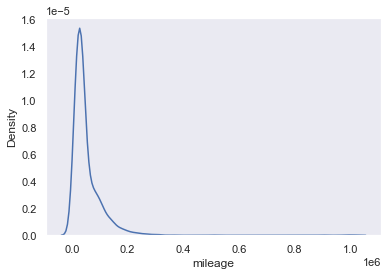

In [79]:
sns.distplot((df['mileage']),hist=False)

C:\Users\Abdullah Fazili\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

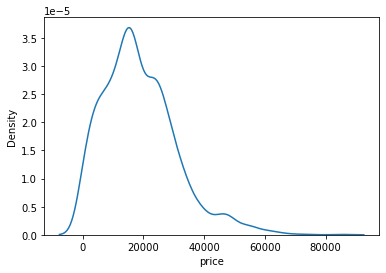

In [30]:
sns.distplot(df['price'],hist=False)


 ` Removing OutLiers`
 * Boxplot
 * Stats

 `BoxPlot Method`

C:\Users\Abdullah Fazili\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mileage'>

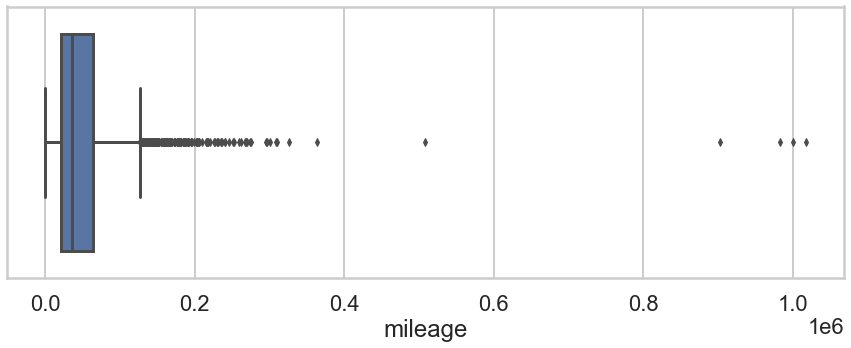

In [31]:
sns.set_theme(
    style="whitegrid",
    context='poster'
)
plt.figure(figsize=(15,5))
sns.boxplot(df['mileage'])


In [32]:
q1 = df['mileage'].quantile(0.25)
q1

21466.5

In [33]:
q3 = df['mileage'].quantile(0.75)
q3

63472.5

In [34]:
IQR = q3 - q1
IQR

42006.0

In [35]:
u_bound = q3 + (1.5 * IQR)
l_bound = q1 - (1.5 * IQR)

In [36]:
print(q1,q3,IQR,u_bound,l_bound)

21466.5 63472.5 42006.0 126481.5 -41542.5


In [37]:
filtered_data = df[(df['mileage'] < u_bound) & (df['mileage'] > l_bound)]

In [38]:
filtered_data.shape

(2310, 10)

In [39]:
df.shape

(2499, 10)

 `Information loss for Boxplot method`

In [40]:
2499-2310

189

In [41]:
round((189/2499)*100,2)

7.56

* Approximately 7.6% Info Loss

 `Static `
 * static threshold of 95 , 99 %ile (value beyond this)
 * static threshold of 0.05 or 0.01

In [42]:
u_thresh = df['mileage'].quantile(0.99)
l_thresh = df['mileage'].quantile(0.01)
u_thresh = round(u_thresh,2)
l_thresh = round(l_thresh,2)

In [43]:
print(u_thresh,'and',l_thresh)

235380.64 and 665.6


In [44]:
filtered_data_2 = df[(df['mileage'] < u_thresh) & (df['mileage'] > l_thresh)]

In [45]:
filtered_data_2.shape

(2449, 10)

In [46]:
2499-2449

50

In [47]:
round((50/2499)*100,2)

2.0

` Approximately 2% loss in our data`

* Feature Extraction conversion of condition to a useful format

In [48]:
df['condition'].unique()

array(['10 days left', '6 days left', '2 days left', '22 hours left',
       '20 hours left', '19 hours left', '3 days left', '21 hours left',
       '17 hours left', '2 hours left', '3 hours left', '34 minutes',
       '16 hours left', '18 hours left', '1 days left', '32 minutes',
       '14 hours left', '5 hours left', '4 days left', '9 days left',
       '23 hours left', '8 days left', '7 days left', '5 days left',
       '9 minutes', '1 minutes', '7 hours left', '16 minutes',
       '6 hours left', '1 hours left', 'Listing Expired', '13 days left',
       '24 hours left', '15 hours left', '53 minutes', '27 minutes',
       '12 days left', '15 days left', '30 minutes', '29 minutes',
       '28 minutes', '48 minutes', '11 days left', '4 hours left',
       '47 minutes', '12 hours left', '36 minutes'], dtype=object)

#### Bi Variate Analysis


* Num to Num plot

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.]),
 [Text(-20000.0, 0, '−20000'),
  Text(0.0, 0, '0'),
  Text(20000.0, 0, '20000'),
  Text(40000.0, 0, '40000'),
  Text(60000.0, 0, '60000'),
  Text(80000.0, 0, '80000'),
  Text(100000.0, 0, '100000')])

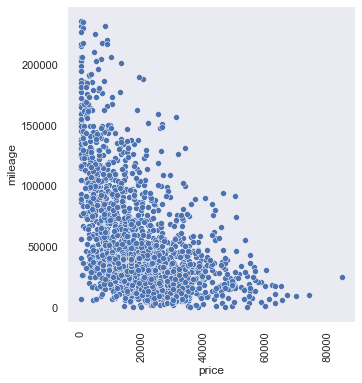

In [49]:
sns.set_theme(
      context="notebook",
      style="dark"
)

sns.relplot(data=filtered_data_2,x='price',y='mileage')
plt.xticks(rotation=90)

#### As Price Increases Mileage Decreases 

 
* `Cat to Num`

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'ford'),
  Text(1, 0, 'dodge'),
  Text(2, 0, 'chevrolet'),
  Text(3, 0, 'gmc'),
  Text(4, 0, 'chrysler'),
  Text(5, 0, 'kia'),
  Text(6, 0, 'buick'),
  Text(7, 0, 'infiniti'),
  Text(8, 0, 'mercedes-benz'),
  Text(9, 0, 'jeep'),
  Text(10, 0, 'bmw'),
  Text(11, 0, 'cadillac'),
  Text(12, 0, 'hyundai'),
  Text(13, 0, 'mazda'),
  Text(14, 0, 'honda'),
  Text(15, 0, 'jaguar'),
  Text(16, 0, 'acura'),
  Text(17, 0, 'harley-davidson'),
  Text(18, 0, 'audi'),
  Text(19, 0, 'lincoln'),
  Text(20, 0, 'lexus'),
  Text(21, 0, 'nissan'),
  Text(22, 0, 'land'),
  Text(23, 0, 'maserati'),
  Text(24, 0, 'ram')])

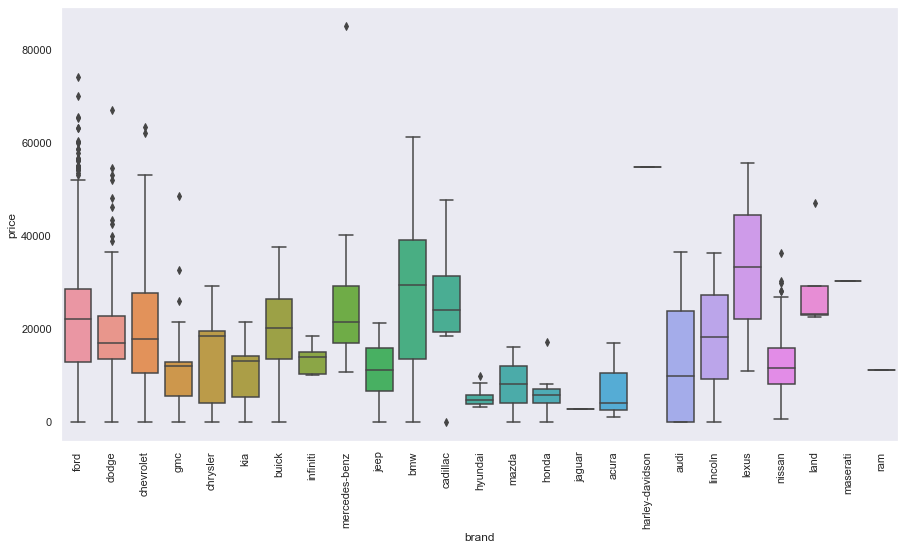

In [50]:
plt.figure(figsize=(15,8))
sns.boxplot(data=filtered_data_2,x='brand',y='price')
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120]),
 [Text(0, 0, 'se'),
  Text(1, 0, 'mpv'),
  Text(2, 0, 'door'),
  Text(3, 0, '1500'),
  Text(4, 0, 'pk'),
  Text(5, 0, 'malibu'),
  Text(6, 0, 'coupe'),
  Text(7, 0, 'wagon'),
  Text(8, 0, 'forte'),
  Text(9, 0, 'encore'),
  Text(10, 0, 'sorento'),
  Text(11, 0, 'doors'),
  Text(12, 0, 'chassis'),
  Text(13, 0, '

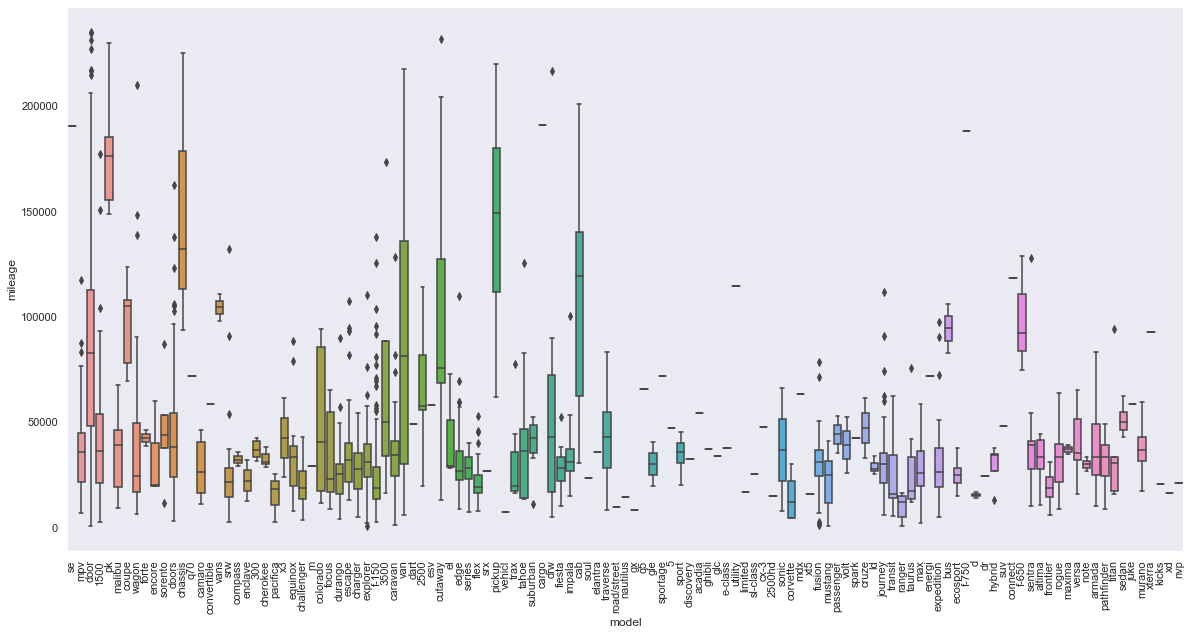

In [51]:
plt.figure(figsize=(20,10))
sns.boxplot(data=filtered_data_2,x='model',y='mileage')
plt.xticks(rotation=90)

In [52]:
df.columns

Index(['price', 'brand', 'model', 'year', 'title_status', 'mileage', 'color',
       'state', 'country', 'condition'],
      dtype='object')

(array([0, 1]), [Text(0, 0, 'clean vehicle'), Text(1, 0, 'salvage insurance')])

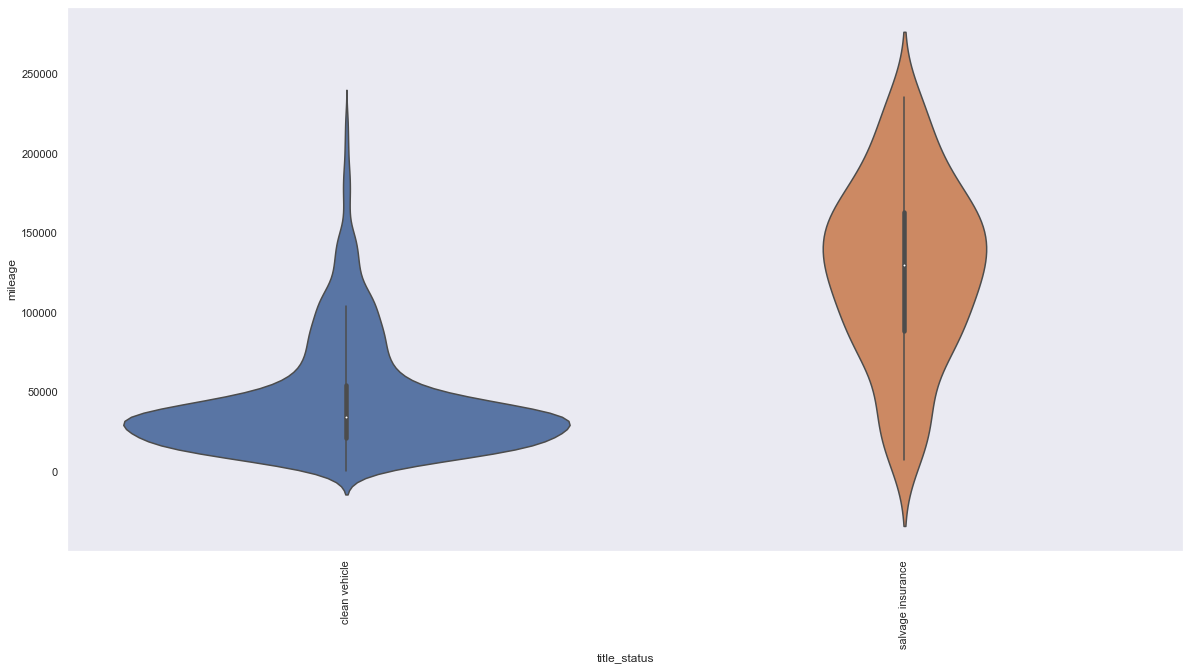

In [53]:
plt.figure(figsize=(20,10))
sns.violinplot(data=filtered_data_2,x='title_status',y='mileage')
plt.xticks(rotation=90)


(array([0, 1]), [Text(0, 0, 'clean vehicle'), Text(1, 0, 'salvage insurance')])

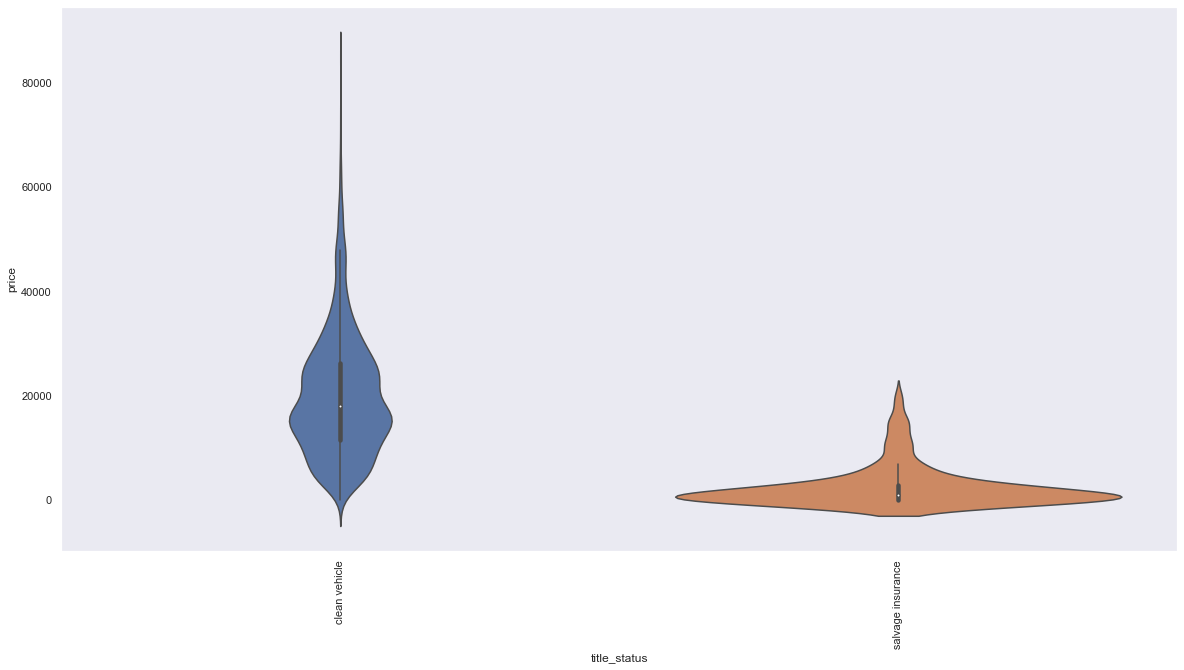

In [54]:
plt.figure(figsize=(20,10))
sns.violinplot(data=filtered_data_2,x='title_status',y='price')
plt.xticks(rotation=90)


C:\Users\Abdullah Fazili\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 [Text(0, 0, 'silver'),
  Text(1, 0, 'blue'),
  Text(2, 0, 'red'),
  Text(3, 0, 'white'),
  Text(4, 0, 'black'),
  Text(5, 0, 'gray'),
  Text(6, 0, 'orange'),
  Text(7, 0, 'brown'),
  Text(8, 0, 'no_color'),
  Text(9, 0, 'gold'),
  Text(10, 0, 'charcoal'),
  Text(11, 0, 'turquoise'),
  Text(12, 0, 'beige'),
  Text(13, 0, 'green'),
  Text(14, 0, 'dark blue'),
  Text(15, 0, 'phantom black'),
  Text(16, 0, 'yellow'),
  Text(17, 0, 'toreador red'),
  Text(18, 0, 'bright white clearcoat'),
  Text(19, 0, 'billet silver metallic clearcoat'),
  Text(20, 0, 'black clearcoat'),
  Text(21, 0, 'jazz blue pearlcoat'),
  Text(22, 0, 'purple'),
  Text(23, 0, 'ruby red metallic tinted clearcoat'),
  Text(24, 0, 'triple yellow tri-coat'),
  Text(25, 0, 'competition orange'),
  Text(26, 0, 'of

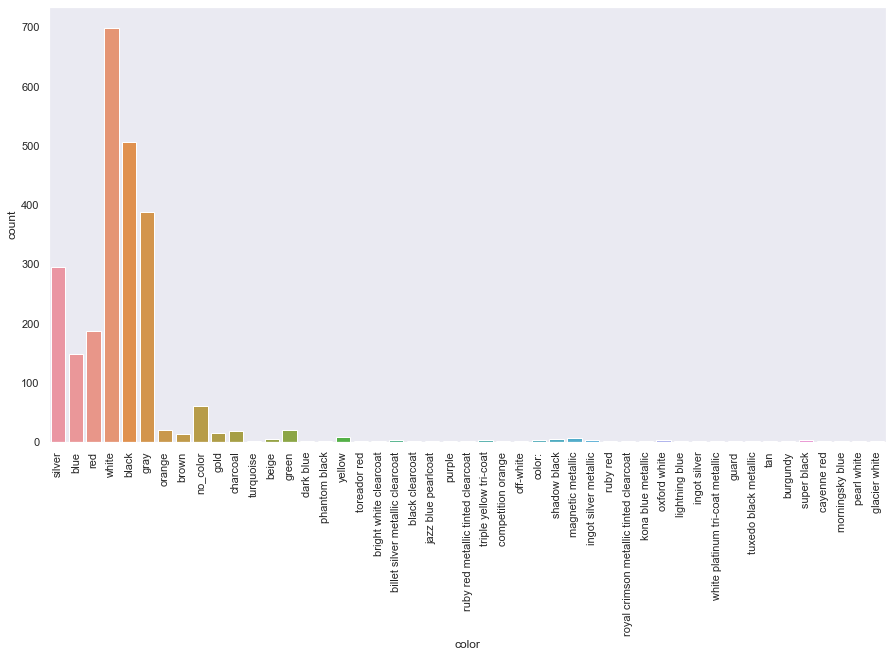

In [55]:
plt.figure(figsize=(15,8))
sns.countplot(filtered_data_2['color'])
plt.xticks(rotation=90)

#### Q1. Top 5 Car brands in terms of number of cars

In [56]:
df['brand']

0          toyota
1            ford
2           dodge
3            ford
4       chevrolet
          ...    
2494       nissan
2495       nissan
2496       nissan
2497       nissan
2498       nissan
Name: brand, Length: 2499, dtype: object

In [57]:
data = []    
for i in df['brand'].unique():
    data.append([i , len(df[df['brand'] == i])])

In [58]:
pd.DataFrame(data,columns = ['brand','freq']).head(5)

,brand,freq
0,toyota,1
1,ford,1235
2,dodge,432
3,chevrolet,297
4,gmc,42


<AxesSubplot:xlabel='brand'>

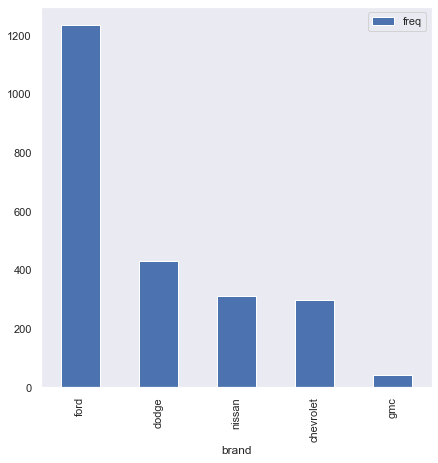

In [59]:
pd.DataFrame(data,columns = ['brand','freq']).sort_values(by='freq',ascending=False).head(5).plot(x='brand',y='freq',kind='bar',figsize=(7,7))

#### Q2 Car brand based on Frequency of Cars

In [60]:
df.columns

Index(['price', 'brand', 'model', 'year', 'title_status', 'mileage', 'color',
       'state', 'country', 'condition'],
      dtype='object')

 `Same code just for every car so will remove .haed(5)`



<AxesSubplot:xlabel='brand'>

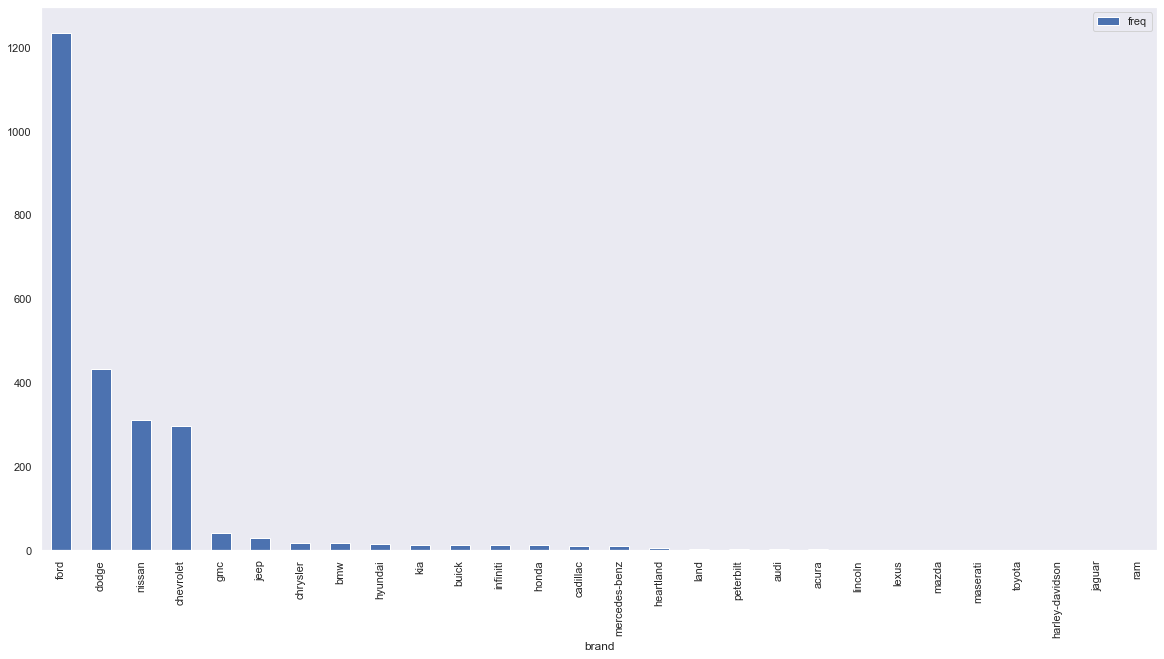

In [61]:
pd.DataFrame(data,columns = ['brand','freq']).sort_values(by='freq',ascending=False).plot(x='brand',y='freq',kind='bar',figsize=(20,10))

#### Q3. Car Industry Trend

In [62]:
df.columns

Index(['price', 'brand', 'model', 'year', 'title_status', 'mileage', 'color',
       'state', 'country', 'condition'],
      dtype='object')

In [63]:
data = []

for year in df['year'].unique():
    data.append([year , len(df[df['year']  == year])])
data

[[2008, 18],
 [2011, 23],
 [2018, 395],
 [2014, 104],
 [2010, 13],
 [2017, 377],
 [2009, 11],
 [2013, 86],
 [2015, 196],
 [2020, 48],
 [2016, 203],
 [1973, 1],
 [2003, 9],
 [2019, 892],
 [2002, 2],
 [2000, 4],
 [2001, 5],
 [2005, 6],
 [2012, 72],
 [2006, 8],
 [2007, 6],
 [1998, 4],
 [2004, 6],
 [1994, 2],
 [1997, 2],
 [1996, 2],
 [1999, 1],
 [1984, 1],
 [1995, 1],
 [1993, 1]]

<AxesSubplot:xlabel='year'>

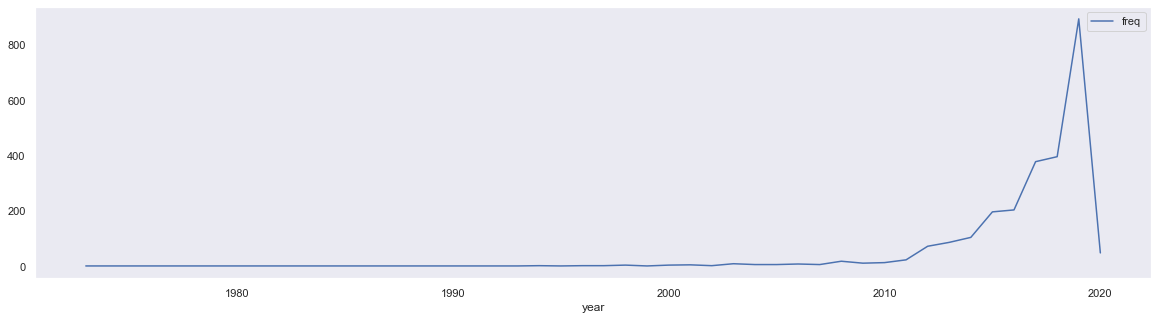

In [64]:
pd.DataFrame(data,columns = ['year','freq']).sort_values(by='year', ascending = True).plot(x = 'year', y = 'freq', kind = 'line', figsize = (20,5))

 #### Q4 Most Popular Car Color  


In [65]:
df.columns

Index(['price', 'brand', 'model', 'year', 'title_status', 'mileage', 'color',
       'state', 'country', 'condition'],
      dtype='object')

In [89]:
data = []
for i in df['color'].unique():
    data.append([i,(len(df[df['color']==i]))])
data    

[['black', 516],
 ['silver', 300],
 ['blue', 151],
 ['red', 192],
 ['white', 707],
 ['gray', 395],
 ['orange', 20],
 ['brown', 15],
 ['no_color', 61],
 ['gold', 19],
 ['charcoal', 18],
 ['turquoise', 1],
 ['beige', 5],
 ['green', 24],
 ['dark blue', 1],
 ['maroon', 1],
 ['phantom black', 1],
 ['yellow', 9],
 ['color:', 5],
 ['light blue', 1],
 ['toreador red', 1],
 ['bright white clearcoat', 2],
 ['billet silver metallic clearcoat', 3],
 ['black clearcoat', 2],
 ['jazz blue pearlcoat', 1],
 ['purple', 1],
 ['ruby red metallic tinted clearcoat', 2],
 ['triple yellow tri-coat', 3],
 ['competition orange', 1],
 ['off-white', 2],
 ['shadow black', 5],
 ['magnetic metallic', 6],
 ['ingot silver metallic', 4],
 ['ruby red', 1],
 ['royal crimson metallic tinted clearcoat', 1],
 ['kona blue metallic', 1],
 ['oxford white', 4],
 ['lightning blue', 1],
 ['ingot silver', 1],
 ['white platinum tri-coat metallic', 2],
 ['guard', 1],
 ['tuxedo black metallic', 2],
 ['tan', 1],
 ['burgundy', 1],
 ['s

<AxesSubplot:xlabel='color'>

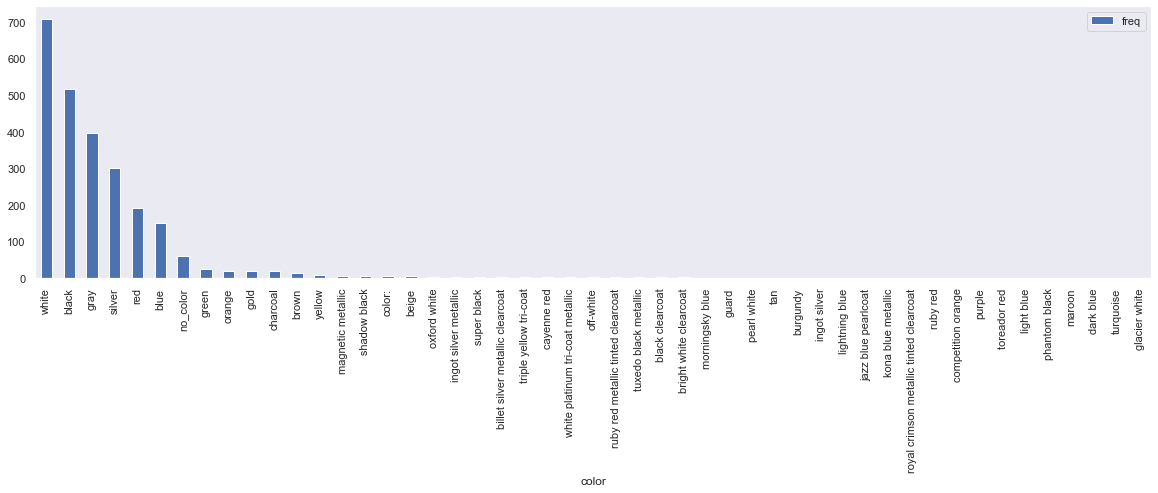

In [90]:
pd.DataFrame(data,columns=('color','freq')).sort_values(by='freq',ascending=False).plot(x='color',y='freq',kind = 'bar',figsize=(20,5))

#### Q5. Which car brand is having Maximum Average Price

In [91]:
df.columns

Index(['price', 'brand', 'model', 'year', 'title_status', 'mileage', 'color',
       'state', 'country', 'condition'],
      dtype='object')

<AxesSubplot:xlabel='brand'>

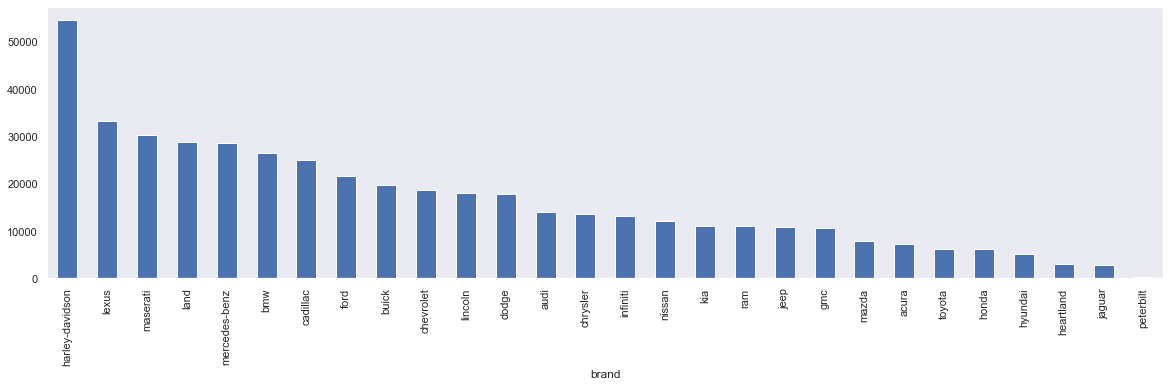

In [92]:
df.groupby('brand').mean()['price'].sort_values(ascending=False).plot(kind='bar',figsize=(20,5))

#### Q6. Which State is having most expensive cars

<AxesSubplot:xlabel='state'>

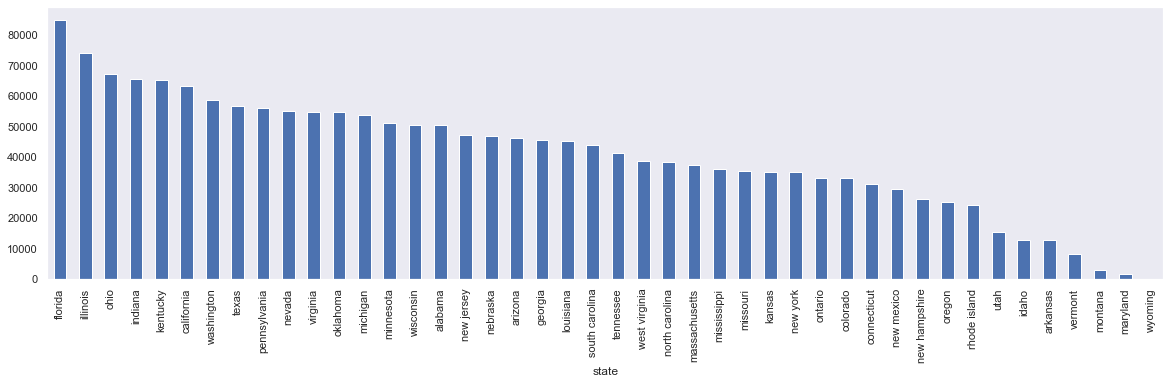

In [93]:
df.groupby('state').max()['price'].sort_values(ascending = False).plot(kind='bar',figsize=(20,5))

 `HomeWork`

#### Q1 Most Expensive Car sold in a year

In [94]:
df.columns

Index(['price', 'brand', 'model', 'year', 'title_status', 'mileage', 'color',
       'state', 'country', 'condition'],
      dtype='object')

<AxesSubplot:xlabel='year'>

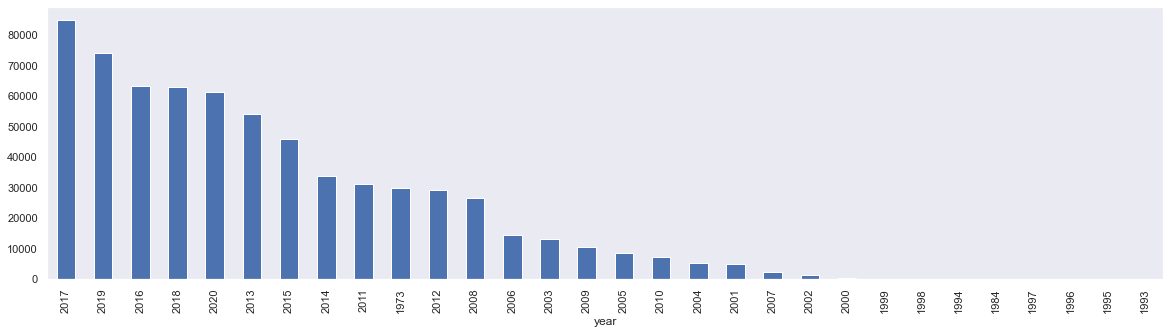

In [95]:
df.groupby('year').max()['price'].sort_values(ascending=False).plot(kind='bar',figsize=(20,5))

In [96]:
df[df['year'] == 1973]

,price,brand,model,year,title_status,mileage,color,state,country,condition
32,29800,chevrolet,camaro,1973,clean vehicle,46226.000,red,pennsylvania,usa,22 hours left


#### Q2 Average price for a car of a particular Brand

<AxesSubplot:xlabel='brand'>

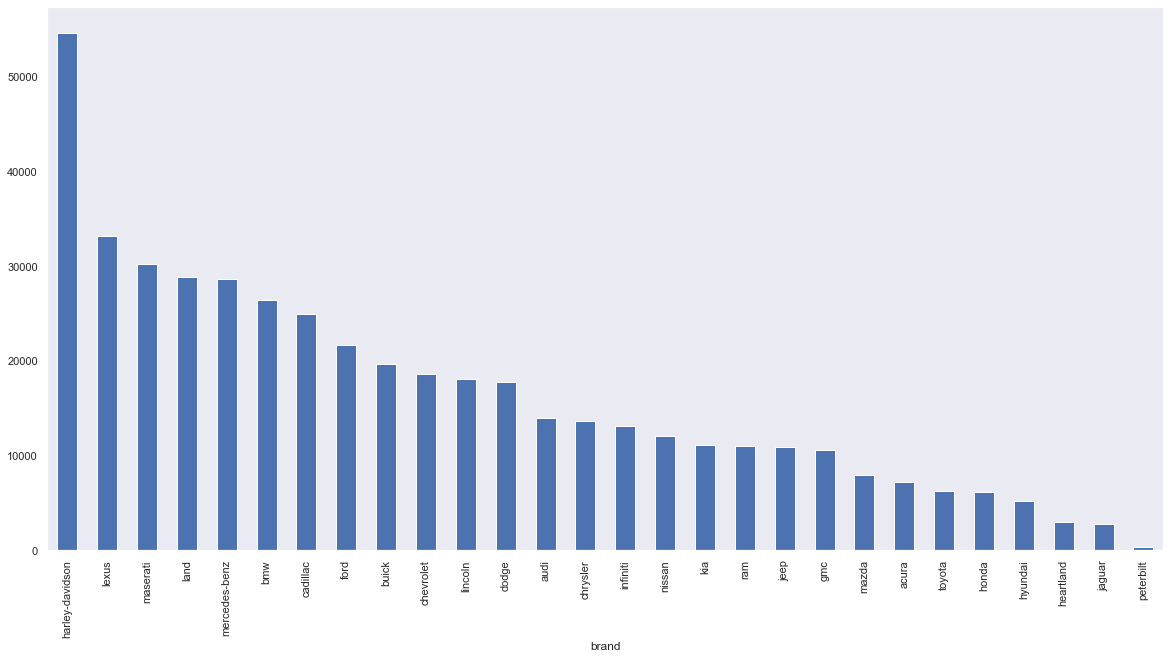

In [97]:
df.groupby('brand').mean()['price'].sort_values(ascending=False).plot(kind='bar',figsize=(20,10))

#### Q3 Realtionship bw price and Title Status

<AxesSubplot:xlabel='title_status', ylabel='price'>

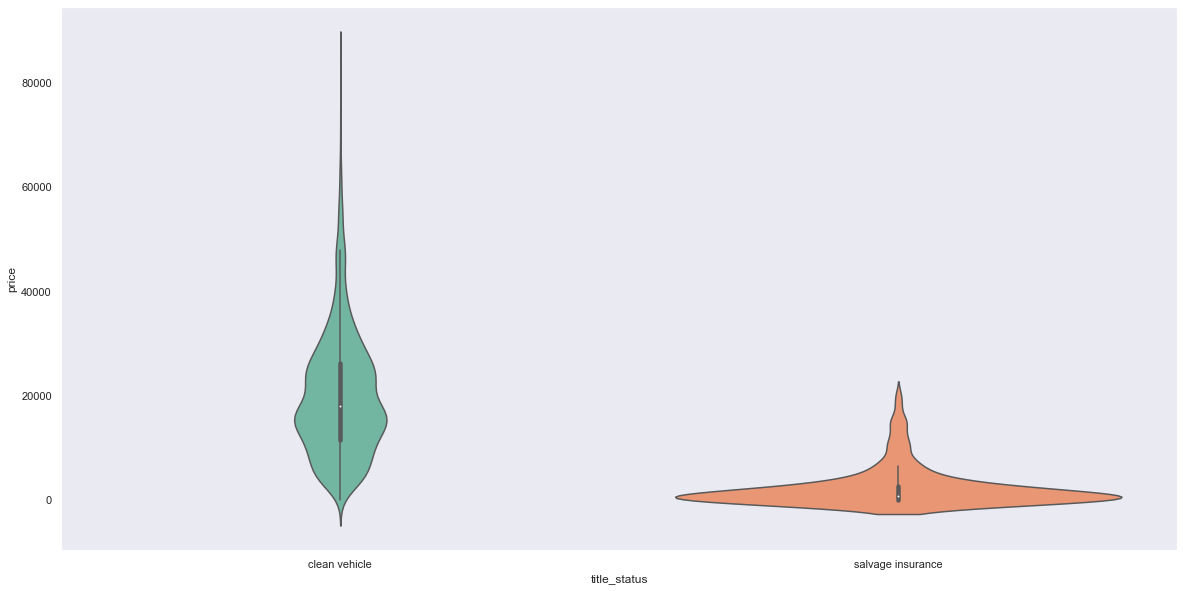

In [98]:
plt.figure(figsize=(20,10))
sns.violinplot(data=df,x='title_status',y='price',palette='Set2')

#### Most popular car for a particular brand

In [99]:
df.groupby('brand').max()['model']

brand
acura                      mdx
audi                        q5
bmw                         x3
buick                   encore
cadillac                   xt5
chevrolet                 volt
chrysler                 wagon
dodge                      van
ford                     wagon
gmc                        mpv
harley-davidson    road/street
heartland                trail
honda                      van
hyundai                    mpv
infiniti                   q70
jaguar                   doors
jeep                       mpv
kia                      wagon
land                     sport
lexus                      mpv
lincoln               nautilus
maserati                ghibli
mazda                     door
mercedes-benz             vans
nissan                  xterra
peterbilt                truck
ram                       door
toyota                 cruiser
Name: model, dtype: object

In [100]:
df

,price,brand,model,year,title_status,mileage,color,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.000,black,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.000,silver,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.000,silver,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.000,blue,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.000,red,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609.000,red,california,usa,1 days left
2495,9200,nissan,versa,2018,clean vehicle,34553.000,silver,florida,usa,21 hours left
2496,9200,nissan,versa,2018,clean vehicle,31594.000,silver,florida,usa,21 hours left
2497,9200,nissan,versa,2018,clean vehicle,32557.000,black,florida,usa,2 days left
